In [1]:
import numpy  as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import socket
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


%matplotlib inline

In [2]:
df = pd.read_csv('df2.csv')
df.head()

,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol,web_service
0,3acee4f4ea001cd5e6d9584d4036b53d,3232266497,192.168.121.1,67,172.16.255.185,67,17,22,7620,328,...,1.555955e+09,1.554399e+12,0.010354,198.657965,51.689181,84.916348,2,Network,Unknown,DHCP
1,974ec5991b439c9a7176b88be0c90df0,3232266497,192.168.121.1,67,172.16.255.186,67,17,17,5670,328,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Network,Unknown,DHCP
2,3acee4f4ea001cd5e6d9584d4036b53d,3232266497,192.168.121.1,67,172.16.255.185,67,17,43,15124,328,...,1.555965e+09,1.554409e+12,0.022332,340.268454,89.927588,124.270745,2,Network,Unknown,DHCP
3,974ec5991b439c9a7176b88be0c90df0,3232266497,192.168.121.1,67,172.16.255.186,67,17,30,10086,328,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Network,Unknown,DHCP
4,cfa7c2740072befaa89c202499729e08,3232266497,192.168.121.1,0,10.130.1.166,0,1,1,56,56,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Network,Unknown,ICMP


In [34]:
# df['load_time_ms'].value_counts()

load_time_ms
16968.0    22
15380.0    18
15342.0    16
18091.0    15
15236.0    15
           ..
10341.0     1
20331.0     1
20581.0     1
7571.0      1
22423.0     1
Name: count, Length: 19587, dtype: int64

array([[<Axes: title={'center': 'load_time_ms'}>]], dtype=object)

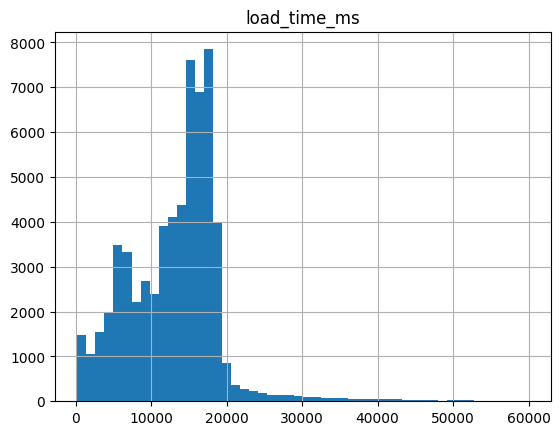

In [35]:
# df.hist(column='load_time_ms', bins = 50)

In [5]:
df.columns

Index(['flow_key', 'src_ip_numeric', 'src_ip', 'src_port', 'dst_ip',
       'dst_port', 'proto', 'pktTotalCount', 'octetTotalCount', 'min_ps',
       'max_ps', 'avg_ps', 'std_dev_ps', 'flowStart', 'flowEnd',
       'flowDuration', 'min_piat', 'max_piat', 'avg_piat', 'std_dev_piat',
       'f_pktTotalCount', 'f_octetTotalCount', 'f_min_ps', 'f_max_ps',
       'f_avg_ps', 'f_std_dev_ps', 'f_flowStart', 'f_flowEnd',
       'f_flowDuration', 'f_min_piat', 'f_max_piat', 'f_avg_piat',
       'f_std_dev_piat', 'b_pktTotalCount', 'b_octetTotalCount', 'b_min_ps',
       'b_max_ps', 'b_avg_ps', 'b_std_dev_ps', 'b_flowStart', 'b_flowEnd',
       'b_flowDuration', 'b_min_piat', 'b_max_piat', 'b_avg_piat',
       'b_std_dev_piat', 'flowEndReason', 'category', 'application_protocol',
       'web_service'],
      dtype='object')

In [3]:
def ip_to_int(ip):
    try:
        ip_int = int.from_bytes(socket.inet_aton(ip), 'big')
        ip_np = np.uint32(ip_int)
        return ip_np
        # return int(ipaddress.ip.)
    except:
        return np.nan


df['src_ip'] = df['src_ip'].apply(ip_to_int)
df["dst_ip"] = df['dst_ip'].apply(ip_to_int)

In [4]:
df[['src_ip', 'dst_ip']]

,src_ip,dst_ip
0,3232266497,2886795193
1,3232266497,2886795194
2,3232266497,2886795193
3,3232266497,2886795194
4,3232266497,176292262
...,...,...
2704834,3232268540,2886795194
2704835,3232268540,2886795193
2704836,3232268540,2886795194
2704837,3232268540,1823542204


In [24]:
# import numpy as np
# import socket

# ip_int = int.from_bytes(socket.inet_aton("192.168.121.1"), 'big')
# ip_np = np.uint32(ip_int)
# ip_int

In [5]:
print(df['src_ip'][0])

3232266497


In [31]:
#  X = df[['load_time_ms','connect_start','navigation_start','secure_connection_start', 'fetch_start',
#        'dom_content_loaded_event_start', 'response_start', 'dom_interactive',
#        'domain_lookup_end', 'response_end', 'redirect_start', 'request_start',
#        'unload_event_end', 'unload_event_start', 'dom_loading', 'dom_complete',
#        'domain_lookup_start', 'load_event_start',
#        'dom_content_loaded_event_end', 'load_event_end', 'redirect_end',
#        'connect_end', 'host_id','navigate_count', 'reload_count',
#        'load_time_ms_avg']].values
# X[0:5]
X = df[['src_ip_numeric', 'dst_ip', 'src_port',
       'dst_port', 'proto', 'pktTotalCount', 'octetTotalCount', 'min_ps',
        'max_ps', 'avg_ps', 'std_dev_ps', 'flowStart', 'flowEnd',
        'flowDuration', 'min_piat', 'max_piat', 'avg_piat', 'std_dev_piat',
        'f_pktTotalCount', 'f_octetTotalCount', 'f_min_ps', 'f_max_ps',
        'f_avg_ps', 'f_std_dev_ps', 'f_flowStart', 'f_flowEnd',
        'f_flowDuration', 'f_min_piat', 'f_max_piat', 'f_avg_piat',
        'f_std_dev_piat', 'b_pktTotalCount', 'b_octetTotalCount', 'b_min_ps',
        'b_max_ps', 'b_avg_ps', 'b_std_dev_ps', 'b_flowStart', 'b_flowEnd',
        'b_flowDuration', 'b_min_piat', 'b_max_piat', 'b_avg_piat',
        'b_std_dev_piat', 'flowEndReason']]
# X.dropna()
X.head(5)
# df.head(5)

,src_ip_numeric,dst_ip,src_port,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,...,b_avg_ps,b_std_dev_ps,b_flowStart,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason
0,3232266497,2886795193,67,67,17,22,7620,328,394,346.363636,...,390.000000,2.000000,1.555955e+09,1.555955e+09,1.554399e+12,0.010354,198.657965,51.689181,84.916348,2
1,3232266497,2886795194,67,67,17,17,5670,328,354,333.529412,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2
2,3232266497,2886795193,67,67,17,43,15124,328,394,351.720930,...,389.384615,1.332347,1.555964e+09,1.555965e+09,1.554409e+12,0.022332,340.268454,89.927588,124.270745,2
3,3232266497,2886795194,67,67,17,30,10086,328,352,336.200000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2
4,3232266497,176292262,0,0,1,1,56,56,56,56.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2


In [34]:
# y = df[['label']]
# y[0:5]
y = df[['category', 'application_protocol', 'web_service']]

In [24]:
# X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [32]:
# type(y)
type(X)

pandas.core.frame.DataFrame

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40)
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (2163871, 45) (2163871, 3)
Test set: (540968, 45) (540968, 3)


In [38]:
# model = RandomForestClassifier()
model = RandomForestClassifier(n_estimators=30, max_depth=30, max_samples=0.5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_samples=0.5, n_estimators=30)

In [39]:
predictions = model.predict(X_test)

In [40]:
for i, col in enumerate(y_test.columns):
    print(
        f"Accuracy for {col}: {accuracy_score(y_test[col], predictions[:, i])}")

Accuracy for category: 0.9393272799869863
Accuracy for application_protocol: 0.9495182709513317
Accuracy for web_service: 0.9053400570828589


In [11]:
k = 9
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
neigh

c:\Users\Arina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=9)

In [12]:
yhat = neigh.predict(X_test)
print(yhat[0:6])
print(y[0:6])

['slow' 'fast' 'same' 'fast' 'fast' 'same']
  label
0  same
1  same
2  same
3  same
4  same
5  same


In [13]:
print("Train set Accuracy:", metrics.accuracy_score(
    y_train, neigh.predict(X_train)))
print("Test set Accuracy:", metrics.accuracy_score(y_test, yhat))

Train set Accuracy: 0.8868249054007568
Test set Accuracy: 0.856003852739726


In [ ]:
# Ks = 10
# mean_acc = np.zeros((Ks-1))
# std_acc = np.zeros((Ks-1))

# for n in range(1,Ks):

#     #Train Model and Predict
#     neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
#     yhat=neigh.predict(X_test)
#     mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


#     std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

# mean_acc

In [19]:
from sklearn.ensemble import RandomForestClassifier
# Assume X_train, y_train, X_test are predefined

# Step 1: Classification
# rf_model = RandomForestClassifier()
# rf_model.fit(X_train, y_train)
# predictions = rf_model.predict(X_test)

# Step 2: Analyze 'slow' connections


def analyze_causes(features):
    causes = []
    load_time_ms_index = ...  # replace with the actual index of 'load_time_ms'
    load_time_avg_index = ...  # replace with the index of 'load_time_avg'
    host_id_index = ...  # replace with the index of 'host_id'

    if features[load_time_ms_index] < features[load_time_avg_index]:
        causes.append('low_load_time')
    # Add more conditions for other causes
    return causes


for i, pred in enumerate(yhat):
    if pred == 'slow':
        features = X_test[i]
        causes = analyze_causes(features)
        host_id = features[host_id_index]
        print(f"Host ID {host_id} is slow due to: {causes}")

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'